In [3]:
mode = "calibration"
# mode = 'testing'
filepath = "all_paths_calibrationdata.txt" #calibration 50 
# filepath = "all_paths_testdata.txt" #testing
# filepath = "subtestset.txt" #testing on subset 500 reviews per level

['human', 'human', 'human', 'human', 'human', 'human', 'human', 'human', 'Level2', 'human', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'human', 'Level2', 'human', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'Level2', 'human', 'Level2', 'Level2', 'Level2', 'Level4']
50
50


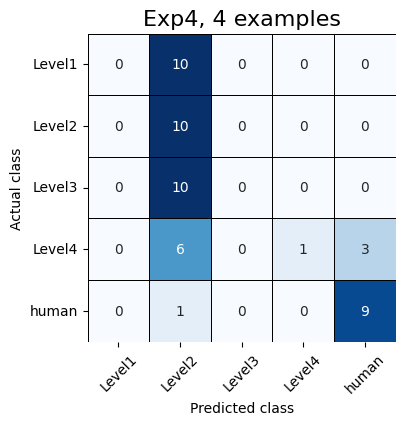

In [12]:
from sklearn.metrics import confusion_matrix
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#create y_true and y_pred
#Read the file all_paths_calibrationdata.txt and get the path to json
#Read the json and extract the prediction

labels = ['Level1','Level2','Level3','Level4','human']
y_pred = []
y_true = []

def get_true_label(path):
    if "level1" in path:
        return "Level1"
    elif "level2" in path:
        return "Level2"
    elif "level3" in path:
        return "Level3"
    elif "level4" in path:
        return "Level4"
    elif "reviews" in path:
        return "human"
    else:
        return None
    
def get_pred_label(path):
    with open(path,"r") as responsejson:
        response = json.load(responsejson)
    prediction = response["prediction"]
    return prediction

with open(filepath,"r") as file:
    calib_path = file.readlines()
    
for path in calib_path:
    # if path.strip() in skippedpaths:
    #     continue
    response_path = path.replace("Data_Preprocessing/cleandata",f"AI_generation/LLamaDetectorResponses_{mode}").replace(".txt",".json").strip()
    y_true.append(get_true_label(response_path))
    y_pred.append(get_pred_label(response_path))
    
print(y_pred)
print(len(y_pred))
print(len(y_true))

cm = confusion_matrix(y_true, y_pred, labels=labels)

# Create DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=[f'{i}' for i in labels], columns=[f'{i}' for i in labels])

# Plotting the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', square=True)

# Customize labels and title
plt.title('Exp4, 4 examples', fontsize=16)
plt.xlabel('Predicted class', fontsize=10)
plt.ylabel('Actual class', fontsize=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:

####Experiment 2
from sklearn.metrics import confusion_matrix
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#create y_true and y_pred
#Read the file all_paths_calibrationdata.txt and get the path to json
#Read the json and extract the prediction

labels = ['AI','human']
y_pred = []
y_true = []

def get_true_label(path):
    if ("level1","level2","level3","level4") in path:
        return "AI"
    elif "reviews" in path:
        return "human"
    else:
        return None
    
def get_pred_label(path):
    with open(path,"r") as responsejson:
        response = json.load(responsejson)
    prediction = response["prediction"]
    return prediction

with open(filepath,"r") as file:
    calib_path = file.readlines()
    
for path in calib_path:
    # if path.strip() in skippedpaths:
    #     continue
    response_path = path.replace("Data_Preprocessing/cleandata",f"AI_generation/LLamaDetectorResponses_{mode}").replace(".txt",".json").strip()
    y_true.append(get_true_label(response_path))
    y_pred.append(get_pred_label(response_path))
    
print(y_pred)
print(len(y_pred))
print(len(y_true))

cm = confusion_matrix(y_true, y_pred, labels=labels)

# Create DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=[f'{i}' for i in labels], columns=[f'{i}' for i in labels])

# Plotting the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', square=True)

# Customize labels and title
plt.title('Exp4, 4 examples', fontsize=16)
plt.xlabel('Predicted class', fontsize=10)
plt.ylabel('Actual class', fontsize=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

['cleandata/nips_2013-2017/2013/train/gpt_4o_latest/level1/f2201f5191c4e92cc5af043eebfd0946_1.txt', 'cleandata/nips_2013-2017/2013/train/gpt_4o_latest/level1/a9be4c2a4041cadbf9d61ae16dd1389e_1.txt', 'cleandata/nips_2013-2017/2013/train/gpt_4o_latest/level1/67d16d00201083a2b118dd5128dd6f59_1.txt', 'cleandata/iclr_2017/train/gpt_4o_latest/level1/783_1.txt', 'cleandata/conll_2016/train/gpt_4o_latest/level1/124_1.txt', 'cleandata/acl_2017/dev/meta-llama-Llama-3.3-70B-Instruct/level1/173_1.txt', 'cleandata/acl_2017/dev/meta-llama-Llama-3.3-70B-Instruct/level1/37_1.txt', 'cleandata/conll_2016/test/meta-llama-Llama-3.3-70B-Instruct/level1/13_1.txt', 'cleandata/iclr_2017/dev/meta-llama-Llama-3.3-70B-Instruct/level1/340_1.txt', 'cleandata/iclr_2017/dev/meta-llama-Llama-3.3-70B-Instruct/level1/375_1.txt']
